In [1]:
# https://wikidocs.net/63618
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

import torchvision
from torchvision import transforms, datasets
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torchvision.io import read_image

import torch.nn.init
from ast import increment_lineno

from PIL import Image
import matplotlib
import matplotlib.pyplot as plt


import torch.nn as nn
import torch.nn.functional as F

import os
import pandas as pd

import cv2

In [2]:
# 2. 딥러닝 모델 설계할 때 활용하는 장비 확인
if torch.cuda.is_available():
     DEVICE=torch.device('cuda')
else:
     DEVICE=torch.device('cpu')

print('Using Pytorch version:',torch.__version__,'Device:',DEVICE)
print(DEVICE)

Using Pytorch version: 1.11.0 Device: cuda
cuda


In [3]:
BATCH_SIZE=32
learning_rate = 0.001

In [49]:
root = ".././Taekwondo/DataSet/train_Image"
test_root = ".././Taekwondo/DataSet/test_Image"

trans = transforms.Compose([transforms.RandomResizedCrop(224,
                            scale = (0.6, 0.6),
                            ratio = (3/4, 4/3)),
                            transforms.Resize((32,32)),                            
                            transforms.ToTensor(),
                            ])

#trans = transforms.Compose([transforms.CenterCrop(256),
#                            transforms.Resize((32,32)),                            
#                            transforms.ToTensor(),
#                            ])

tests = transforms.Compose([transforms.Resize((32,32)),
                            transforms.ToTensor(),
                            ])

test_dataset = torchvision.datasets.ImageFolder(root = test_root,
                                           transform = tests)

trainset = torchvision.datasets.ImageFolder(root = root,
                                           transform = trans)

train_loader = torch.utils.data.DataLoader(dataset=trainset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          drop_last=True)

In [50]:
# 4. 데이터 확인하기(1)
for(X_train,Y_train)in train_loader:
    print('X_train:',X_train.size(),'type:', X_train.type())
    print('Y_train:',Y_train.size(),'type:', Y_train.type())
    break

X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
Y_train: torch.Size([32]) type: torch.LongTensor


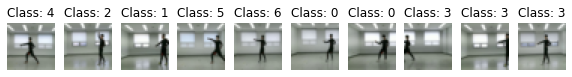

In [51]:
# 5. 데이터 확인하기(2)
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)     # 여러 그래프 그리기, 첫숫자 : 행, 둘째 : 열
    plt.axis('off')           # 축없음
    plt.imshow(np.transpose(X_train[i],(1,2,0)))
    plt.title('Class: ' + str(Y_train[i].item()))
# imshow : 이미지 출력

In [4]:
from __future__ import print_function
import cv2 as cv
import argparse
parser = argparse.ArgumentParser(description='This program shows how to use background subtraction methods provided by \
                                              OpenCV. You can process both videos and images.')
parser.add_argument('--input', type=str, help='Path to a video or a sequence of image.', default='vtest.avi')
parser.add_argument('--algo', type=str, help='Background subtraction method (KNN, MOG2).', default='MOG2')
args = parser.parse_args()
if args.algo == 'MOG2':
    backSub = cv.createBackgroundSubtractorMOG2()
else:
    backSub = cv.createBackgroundSubtractorKNN()
capture = cv.VideoCapture(cv.samples.findFileOrKeep(args.input))
if not capture.isOpened():
    print('Unable to open: ' + args.input)
    exit(0)
while True:
    ret, frame = capture.read()
    if frame is None:
        break
    
    fgMask = backSub.apply(frame)
    
    
    cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    
    cv.imshow('Frame', frame)
    cv.imshow('FG Mask', fgMask)
    
    keyboard = cv.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

usage: ipykernel_launcher.py [-h] [--input INPUT] [--algo ALGO]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\user\AppData\Roaming\jupyter\runtime\kernel-4de160e8-3f15-4bb9-b9bb-d76bdefaabb1.json


SystemExit: 2

C:\Anaconda3\envs\project\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
